**Data Generation for K-Means Clustering Technique**

In [115]:
# libraries
import numpy
import random
import matplotlib.pyplot

In [116]:
'''
'data_generation()' function creates sample coordinates.
Inputs:
num_of_samples = Number of observations required in a cluster
X_Cooridinate_Start = Minimum X-cooridinate of an observation in the cluster
X_Cooridinate_End = Maximum X-cooridinate of an observation in the cluster
Y_Cooridinate_Start = Minimum Y-cooridinate of an observation in the cluster
Y_Cooridinate_End = Maximum Y-cooridinate of an observation in the cluster

Return: Two Arraylist each for X-coordinates and Y-coordinates of observations in the cluster
'''
def data_generation(num_of_samples, 
                    X_Cooridinate_Start, 
                    X_Cooridinate_End, 
                    Y_Cooridinate_Start, 
                    Y_Cooridinate_End):
    cluster_X = numpy.random.random(size=(num_of_samples))
    cluster_X = cluster_X * (X_Cooridinate_End - X_Cooridinate_Start) + X_Cooridinate_Start
    cluster_Y = numpy.random.random(size=(num_of_samples))
    cluster_Y = cluster_Y * (Y_Cooridinate_End - Y_Cooridinate_Start) + Y_Cooridinate_Start
    return cluster_X, cluster_Y

In [117]:
'''
raw_data() function generates cluster of obervations/data-points based on the input of the user
clusters_count = Number of clusters

Return: A dictionary of cluster.

Output example: {'cluster_0': [[<list-of-X-coordinates],[<list-of-Y-coordinates]],
          'cluster_1': [[<list-of-X-coordinates],[<list-of-Y-coordinates]],
          ..
          ..
          'cluster_n': [[<list-of-X-coordinates],[<list-of-Y-coordinates]] }
'''
def raw_data(clusters_count):
    cluster_map = {}
    input_list = []
    for i in range(clusters_count):
        input_list.append([random.randint(25,60),random.randint(0,100),random.randint(20,100),random.randint(0,100),random.randint(20,100)])
    
    for i in range(len(input_list)):
        X_coordinate_list = data_generation(input_list[i][0],input_list[i][1],input_list[i][2],
                                            input_list[i][3],input_list[i][4])[0]
        Y_coordinate_list = data_generation(input_list[i][0],input_list[i][1],input_list[i][2],
                                            input_list[i][3],input_list[i][4])[1]
        cluster_map[f'cluster_{i}'] = [X_coordinate_list,Y_coordinate_list]
    return cluster_map

In [118]:
'''
'plot_input()' plots the input data on a 2-D plane.
input_data = Data provided by the user. It is a dictionary.

Return: A 2-D plot
'''
def plot_input(input_data):
    for i in range(len(input_data)):
        coordinate_list = input_data[f'cluster_{i}']
        matplotlib.pyplot.scatter(coordinate_list[0],
                                  coordinate_list[1])

    return matplotlib.pyplot.show()

In [285]:
import numpy
import matplotlib.pyplot as plt

In [286]:
cluster1_num_samples = 10
cluster1_x1_start = 0
cluster1_x1_end = 5
cluster1_x2_start = 2
cluster1_x2_end = 6
cluster1_x1 = numpy.random.random(size=(cluster1_num_samples))
cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start
cluster1_x2 = numpy.random.random(size=(cluster1_num_samples))
cluster1_x2 = cluster1_x2 * (cluster1_x2_end - cluster1_x2_start) + cluster1_x2_start

In [287]:
cluster2_num_samples = 10
cluster2_x1_start = 4
cluster2_x1_end = 12
cluster2_x2_start = 14
cluster2_x2_end = 18
cluster2_x1 = numpy.random.random(size=(cluster2_num_samples))
cluster2_x1 = cluster2_x1 * (cluster2_x1_end - cluster2_x1_start) + cluster2_x1_start
cluster2_x2 = numpy.random.random(size=(cluster2_num_samples))
cluster2_x2 = cluster2_x2 * (cluster2_x2_end - cluster2_x2_start) + cluster2_x2_start

In [288]:
c1 = numpy.array([cluster1_x1, cluster1_x2]).T
c2 = numpy.array([cluster2_x1, cluster2_x2]).T

data = numpy.concatenate((c1, c2), axis=0)
#data
# the numpy lists 1st 10 list are X,Y coordinates of cluster 1 points and rest 10 list are 
# X,Y coordinates of cluster 2 points
#print(f'Size of array is: {data.size} and shape is: {data.shape}')

In [289]:
num_clusters = 2

Calculate the Euclidean Distance

In [290]:
'''
euclidean_distance() accepts 2 inputs X and Y. 
One of these inputs can be a 2-D array with multiple samples, and the other input should be a 1-D array with just 1 sample. 
The function calculates and returns the Euclidean distances between each sample in the 2-D array and 
the single sample in the 1-D array
'''
def euclidean_distance(X, Y):
    return numpy.sqrt(numpy.sum(numpy.power(X - Y, 2), axis=1))

The result of the euclidean_distance() function is a 1-D array with a number of elements equal to the number of elements in the 2-D array, which is 20 in this example

In [291]:
'''
Input: 
1. solution is the initial coordinates of centriods. For example,
if num_of_clusters = 2, then
solution = [C1-x, C1-y, C2-x, C2-y]
2. data is the whole data, all the samples

'''

def cluster_data(solution):
    global num_clusters, data
    feature_vector_length = data.shape[1]
    cluster_centers = []
    all_clusters_dists = []
    clusters = []
    clusters_sum_dist = []

    for clust_idx in range(num_clusters):
        cluster_centers.append(solution[feature_vector_length*clust_idx:feature_vector_length*(clust_idx+1)])
        cluster_center_dists = euclidean_distance(data, cluster_centers[clust_idx])
        all_clusters_dists.append(numpy.array(cluster_center_dists))

    cluster_centers = numpy.array(cluster_centers)
    all_clusters_dists = numpy.array(all_clusters_dists)

    cluster_indices = numpy.argmin(all_clusters_dists, axis=0)
    for clust_idx in range(num_clusters):
        clusters.append(numpy.where(cluster_indices == clust_idx)[0])
        if len(clusters[clust_idx]) == 0:
            clusters_sum_dist.append(0)
        else:
            clusters_sum_dist.append(numpy.sum(all_clusters_dists[clust_idx, clusters[clust_idx]]))

    clusters_sum_dist = numpy.array(clusters_sum_dist)

    return cluster_centers, all_clusters_dists, clusters, clusters_sum_dist

In [292]:
'''
fitness_func() is created and calls the cluster_data() function and 
calculates the sum of distances in all clusters
'''
def fitness_func(solution):
    fit_list = []
    m,_ = solution.shape
    for t in range(m):
        _, _, _, clusters_sum_dist = cluster_data(solution[t])
        fitness = 1.0 / (numpy.sum(clusters_sum_dist) + 0.00000001)
        fit_list.append(fitness)

    return numpy.array(fit_list)

In [293]:
""" import pygad

num_genes = num_clusters * data.shape[1]
ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=10,
                       num_parents_mating=5,
                       keep_parents=2,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       suppress_warnings=True)

ga_instance.run()

best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
print("Best solution is {bs}".format(bs=best_solution))
print("Fitness of the best solution is {bsf}".format(bsf=best_solution_fitness))
print("Best solution found after {gen} generations".format(gen=ga_instance.best_solution_generation)) """

' import pygad\n\nnum_genes = num_clusters * data.shape[1]\nga_instance = pygad.GA(num_generations=100,\n                       sol_per_pop=10,\n                       num_parents_mating=5,\n                       keep_parents=2,\n                       num_genes=num_genes,\n                       fitness_func=fitness_func,\n                       suppress_warnings=True)\n\nga_instance.run()\n\nbest_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()\nprint("Best solution is {bs}".format(bs=best_solution))\nprint("Fitness of the best solution is {bsf}".format(bsf=best_solution_fitness))\nprint("Best solution found after {gen} generations".format(gen=ga_instance.best_solution_generation)) '

In [294]:
#GENERATE Initial coordinates for cluster center

def init_cluster_center(num_clusters,start_coord,end_coord):
    io = []
    rc = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
    """ cluster1_num = num_clusters*2
    cluster1_x1_start = start_coord
    cluster1_x1_end = end_coord
    cluster1_x1 = numpy.random.random(size=(cluster1_num))
    cluster1_x1 = cluster1_x1 * (cluster1_x1_end - cluster1_x1_start) + cluster1_x1_start """
    cluster1_x1 = numpy.array([2, 3, 9, 15])
    io.append(cluster1_x1)
    for y in range(len(rc)):
        ui = rc[y]*cluster1_x1
        io.append(ui)
    return numpy.array(io)
# return: numpy array: [[C1-x C1-y C2-x C2-y][][][]....]

In [295]:
#SELECTION FUNCTION

def selection(pop,sample_size, fitness):
    m,n = pop.shape
    new_pop = pop.copy()
        
    for i in range(m):
        rand_id = numpy.random.choice(m, size=max(1, int(sample_size*m)), replace=False)
        max_id = rand_id[fitness[rand_id].argmax()]
        new_pop[i] = pop[max_id].copy()
    
    return new_pop

In [296]:
#CROSSOVER

def crossover(pop, pc):
    m,n = pop.shape
    new_pop = pop.copy()
    
    for i in range(0, m-1, 2):
        if numpy.random.uniform(0, 1) < pc:
            pos = numpy.random.randint(0, n-1)
            new_pop[i, pos+1:] = pop[i+1, pos+1:].copy()
            new_pop[i+1, pos+1:] = pop[i, pos+1:].copy()
            
    return new_pop

In [332]:
#MUTATION

def mutation(pop, pm):
    m,n = pop.shape
    new_pop = pop.copy()
    mutation_prob = (numpy.random.uniform(0, 1, size=(m,n)) < pm).astype(int)
    return (mutation_prob + new_pop)

In [333]:
#PRINT RESULT
def get_results(generation,population,fitness):
    m = population.shape[0]
    best = [fitness.max()]
    index = numpy.where(numpy.isclose(fitness, best))
    population = numpy.array(population)
    print(f'Generation #{generation}   |fitness: {max(fitness):0.5f} |Centroid = {population[index[0]][0]}')


In [334]:
#PLOT FITNESS VALUES
def display_plot(best):
    plt.plot(best, color='c')
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    plt.grid()
    plt.show()

In [335]:
#GENETIC ALGORITHM

def GeneticAlgorithm(func, num_clusters,start_coord,end_coord, 
                     ps=0.2, pc=1.0, pm=0.1, max_iter=100, random_state=123):
    
    numpy.random.seed(random_state)
    pop = init_cluster_center(num_clusters,start_coord,end_coord)
    fitness = func(pop)
    best = [fitness.max()]    
    print('=' * 68)
    get_results(-1,pop,fitness)
    i = 0
    while i < max_iter:
        pop = selection(pop, ps, fitness)
        pop = crossover(pop, pc)
        pop = mutation(pop, pm)
        fitness = func(pop)
        best.append(fitness.max())
        get_results(i,pop,fitness)
        i += 1
        
    return fitness, best, i, pop

In [336]:
_, plot_result, _, _ = GeneticAlgorithm(fitness_func,2,0,20)

Generation #-1   |fitness: 0.02184 |Centroid = [ 2.2  3.3  9.9 16.5]
Generation #0   |fitness: 0.02404 |Centroid = [ 2.6  3.9  9.  15. ]
Generation #1   |fitness: 0.02446 |Centroid = [ 3.6  3.9  9.  15. ]
Generation #2   |fitness: 0.02322 |Centroid = [ 2.6  3.9  9.9 16.5]
Generation #3   |fitness: 0.02275 |Centroid = [ 3.2  4.8  9.9 16.5]
Generation #4   |fitness: 0.02433 |Centroid = [ 2.6  4.9  9.  16.5]
Generation #5   |fitness: 0.02457 |Centroid = [ 4.2  4.9  9.  16.5]
Generation #6   |fitness: 0.02500 |Centroid = [ 4.2  4.9  9.  16. ]
Generation #7   |fitness: 0.02571 |Centroid = [ 3.2  4.8  9.  16. ]
Generation #8   |fitness: 0.02571 |Centroid = [ 3.2  4.8  9.  16. ]
Generation #9   |fitness: 0.02571 |Centroid = [ 3.2  4.8  9.  16. ]
Generation #10   |fitness: 0.02571 |Centroid = [ 3.2  4.8  9.  16. ]
Generation #11   |fitness: 0.02571 |Centroid = [ 3.2  4.8  9.  16. ]
Generation #12   |fitness: 0.02427 |Centroid = [ 3.2  4.8  9.  17. ]
Generation #13   |fitness: 0.02427 |Centroid

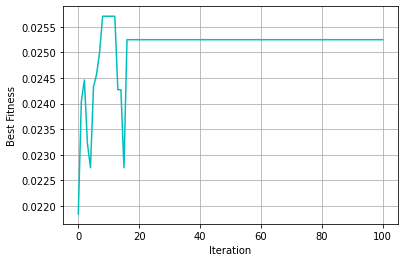

In [337]:
display_plot(plot_result)